In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [20]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [21]:
data = data.drop(['availability','society','balcony','availability'],axis = 'columns')

In [22]:
data.dropna()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [23]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
data['BHK'] = data['size'].apply(lambda x: int(str(x).split(' ')[0]) if isinstance(x, str) else None)

In [25]:
data[data.BHK>20]

,area_type,location,size,total_sqft,bath,price,BHK
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27.0
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0


In [26]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def floatyboi(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
data[~data['total_sqft'].apply(floatyboi)].head(10)

,area_type,location,size,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4.0
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4.0
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
224,Super built-up Area,Devanahalli,3 BHK,1520 - 1740,NaN,74.820,3.0
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0


In [29]:
def meanify(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None 

In [30]:
data['total_sqft'] = data['total_sqft'].apply(meanify)

In [31]:
data['price_per_sqft'] = (data['price']*100000/data['total_sqft'])

In [32]:
len(data['location'].unique())

1306

In [33]:
data['BHK'] = data['BHK'].replace([None, ''], np.nan)
data = data.dropna(subset=['BHK'])
data['BHK'] = data['BHK'].astype(int)

In [34]:
#data.location = data.location.apply(lambda x: x.strip())
loc_status = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(loc_status.to_string())

location
Whitefield                                            539
Sarjapur  Road                                        397
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             212
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bella

In [35]:
len(loc_status[loc_status<10])

1051

In [36]:
loc_less_than_10 = loc_status[loc_status<=10]
print(loc_less_than_10.to_string())

location
Nagadevanahalli                                       10
Naganathapura                                         10
BTM 1st Stage                                         10
Nagappa Reddy Layout                                  10
Basapura                                              10
Sadashiva Nagar                                       10
Gunjur Palya                                          10
1st Block Koramangala                                 10
Dodsworth Layout                                      10
Ganga Nagar                                           10
Dairy Circle                                          10
Kalkere                                               10
Jakkur Plantation                                      9
Banagiri Nagar                                         9
Vishwanatha Nagenahalli                                9
Volagerekallahalli                                     9
4th Block Koramangala                                  9
Chandra Layout        

In [37]:
len(data.location.unique())

1305

In [38]:
data.location = data.location.apply(lambda x : 'other' if x in loc_less_than_10 else x)
len(data.location.unique())

243

In [39]:
data.head(10)

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [40]:
data[data['total_sqft']/data['BHK']<300].head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [41]:
data.shape

(13304, 8)

In [42]:
data1 = data[~(data['total_sqft']/data['BHK']<300)]
data1.shape

(12560, 8)

In [43]:
data1['price_per_sqft'].describe()

count     12514.000000
mean       6307.367132
std        4160.773691
min         267.829813
25%        4210.762120
50%        5295.073227
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data2 = remove_price_outliers(data1)
data2.shape

(10289, 8)

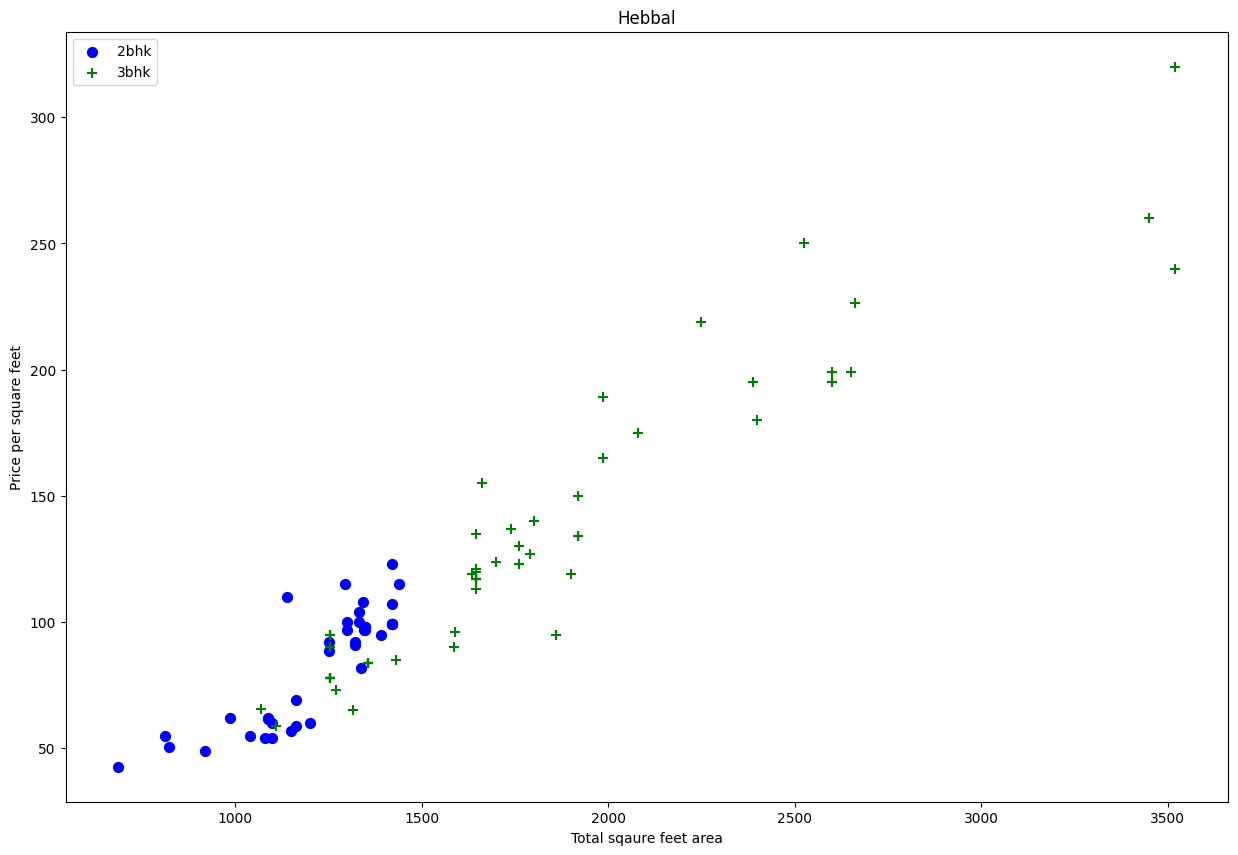

In [45]:
def plot_scatter(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3bhk',s=50)
    plt.xlabel('Total sqaure feet area')
    plt.ylabel('Price per square feet')
    plt.title(location)
    plt.legend()
plot_scatter(data2,"Hebbal")

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data3 = remove_bhk_outliers(data2)
data3.shape

(7365, 8)

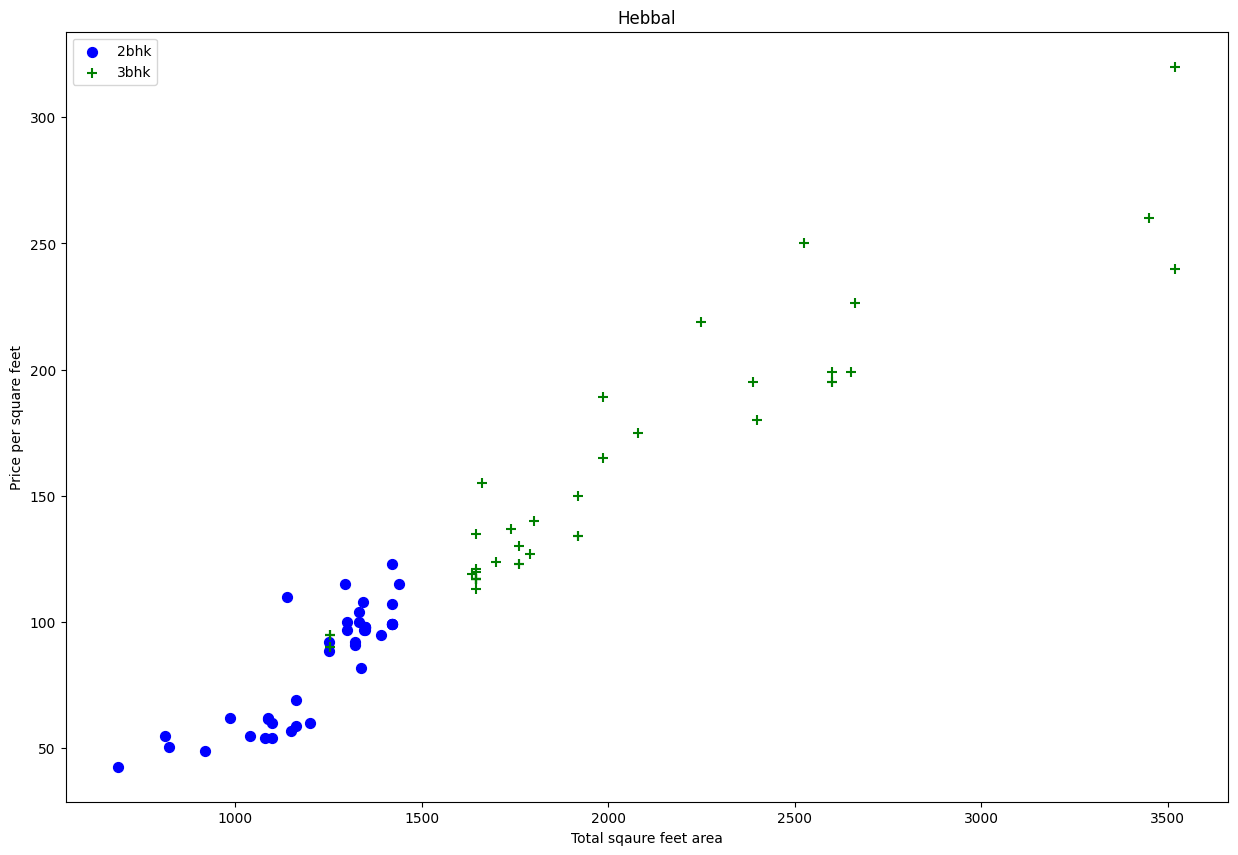

In [47]:
plot_scatter(data3,"Hebbal")

Text(0, 0.5, 'count')

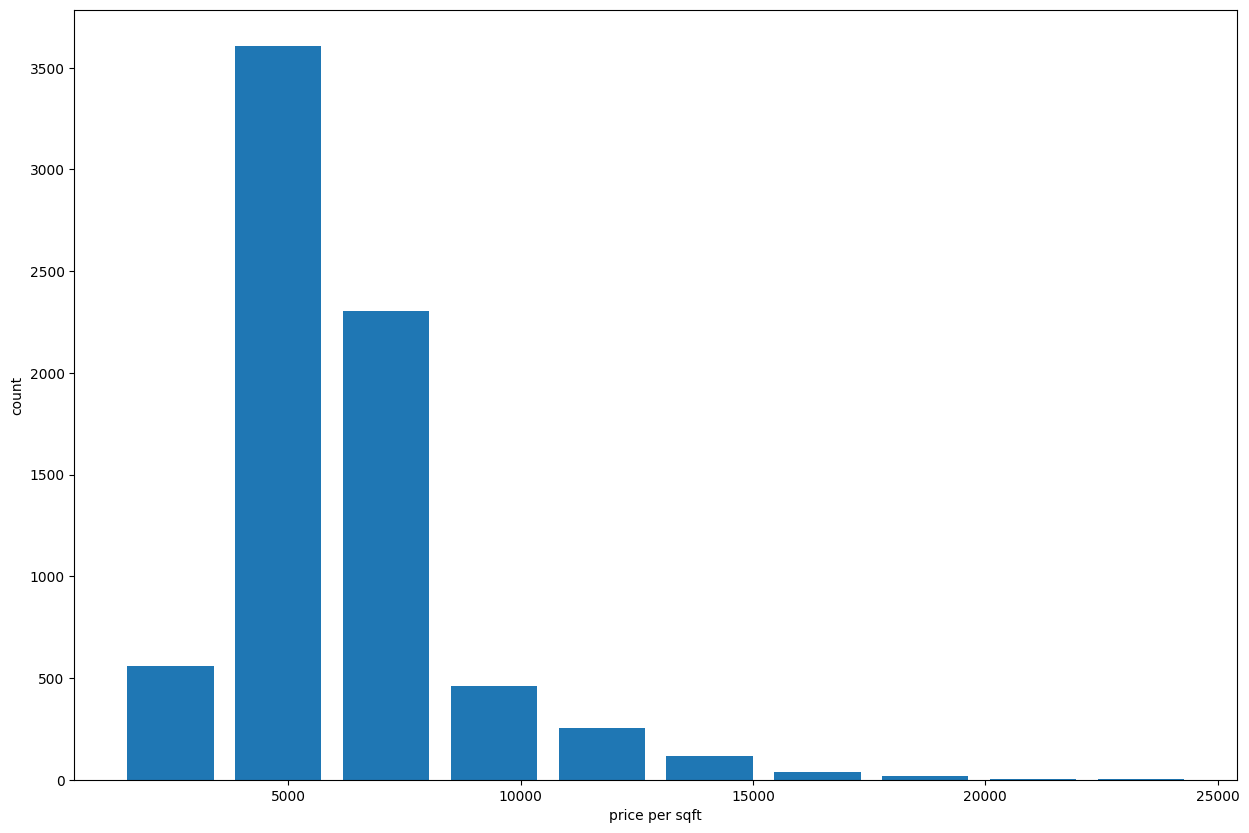

In [48]:
plt.hist(data3.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")

In [49]:
data3.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., nan,  7.,  9., 12., 16., 13.])

In [50]:
data3[data3.bath>10]

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
5300,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8525,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8614,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9353,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9685,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

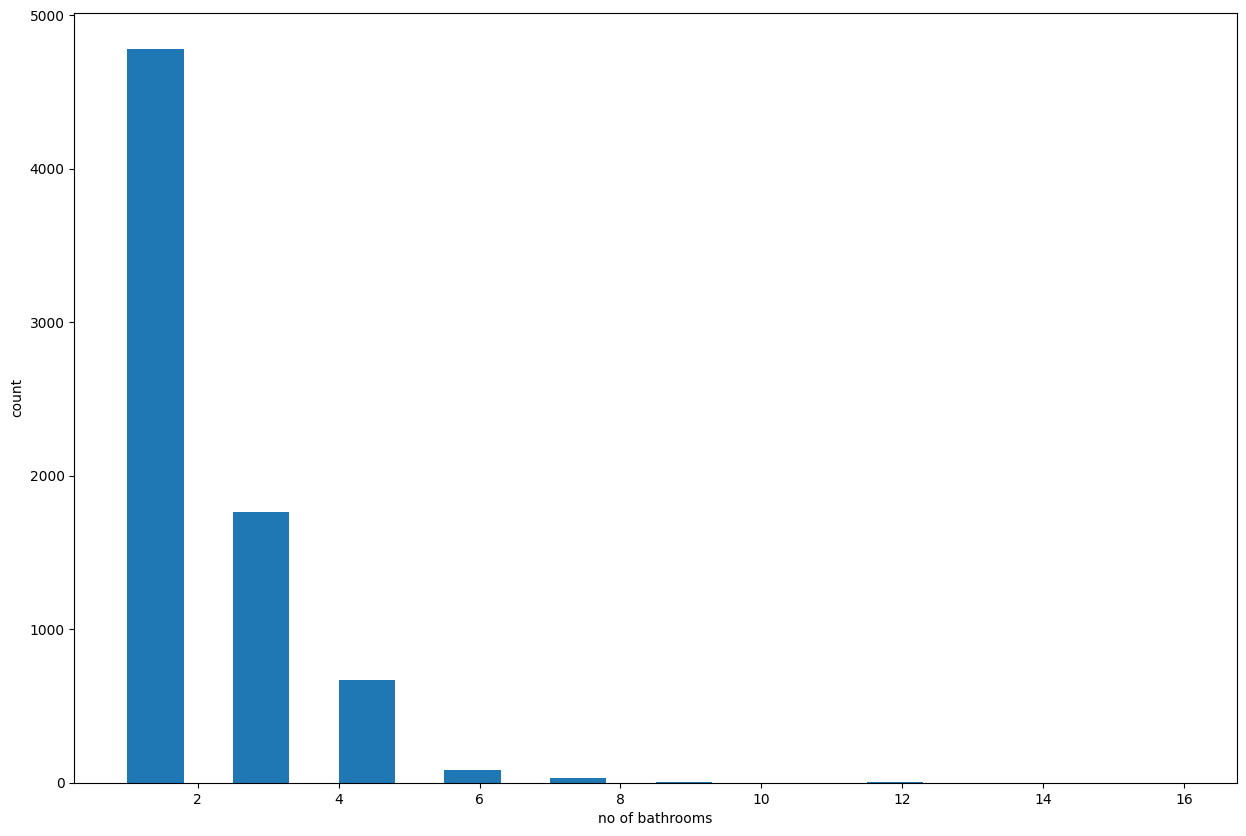

In [51]:
plt.hist(data3.bath,width=0.8)
plt.xlabel('no of bathrooms')
plt.ylabel('count')

In [52]:
data3.drop('area_type',axis=True,inplace=True)
data3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [53]:
data3[data3.bath>data3.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1645,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5261,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6739,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8449,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [54]:
data4 = data3[data3['bath']<data3['BHK']+2]
data4.shape

(7255, 7)

In [55]:
data5 = data4.drop(['size','price_per_sqft'],axis='columns')
data5.head()

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [56]:
dummies = pd.get_dummies(data5.location,dtype=int)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data6 = pd.concat([data5,dummies.drop('other',axis='columns')],axis='columns')

In [58]:
data6.head()

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data7 = data6.drop('location',axis=True)
data7.head(2)

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X = data7.drop('price',axis=True)
X.head()

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y = data7.price
print(y.to_string())

1          40.000
2          83.000
3          40.000
4          65.000
5          43.000
6          36.000
7          76.000
8          58.000
9          75.000
10         47.000
11         40.000
13        428.000
14        194.000
15        235.000
16        130.000
17        148.000
18        413.000
19        368.000
21        167.000
22         85.000
23        210.000
25        225.000
26        100.000
27         93.000
28        180.000
29         50.000
30        131.000
31        210.000
32         88.500
33         86.000
34         85.000
35        175.000
37         85.000
39         75.000
40         50.750
41         40.250
42         47.250
43         47.250
44         41.000
45         69.000
46         47.250
47         40.250
48        220.000
51        200.000
52        225.000
53        230.000
54         56.000
55         70.000
56         69.000
57         48.000
58        130.000
59        300.000
60         60.000
61         52.500
62         62.800
63        

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [102]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8783200743879268

In [103]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cvs = cross_val_score(LinearRegression(),X,y,cv=cv)
print(cvs*100)

[78.32449474 86.15556891 85.57847142 86.39299727 85.09826961]


In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(X,y):
    algos={
        'linear_reg':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept': [True,False]
            }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_*100,
            'best_parameters':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
find_best_model(X,y)

,model,best_score,best_parameters
0,linear_reg,84.367351,{'fit_intercept': False}
1,Lasso,68.361729,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,74.538421,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [114]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [115]:
X.columns 

Index(['total_sqft', 'bath', 'BHK', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [116]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\venuk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(88.31952798093695)

In [124]:
predict_price('1st Phase JP Nagar',1000,3,3)

c:\Users\venuk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(87.61720694906562)

In [119]:
predict_price('Indira Nagar',1000,2,2)

c:\Users\venuk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(186.11552533629208)

In [122]:
predict_price('Indira Nagar',1000,3,3)

c:\Users\venuk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(185.41320430442073)

In [127]:
import pickle
with open('banglore_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [128]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open ('columns.json','w') as f:
    f.write(json.dumps(columns))